Verteilung der Bruttogrundflächen je Geschoßflächenanzahl in Österreich

761.0 mio m²


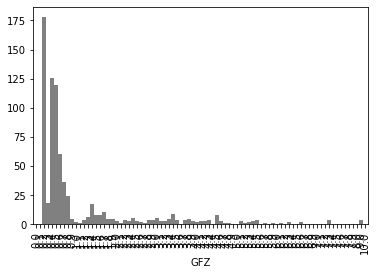

In [3]:

import pandas as pd

df = pd.read_excel("gfz_analysis.xlsx", sheet_name="python") # mio m2
df.index = df.GFZ
#df = df[df.index < 5.2]
ax = df.BGF.plot(kind="bar", width=1, color="grey")
print(df.BGF.sum().round(), "mio m²")


Festlegung der Gebäude-Typologien bzw Klassen hinsichtlich erreichbarer PE-Bilanz

In [5]:
from utils.targets import target, Zielwert, ZQSynergy
from functools import partial

anteile = {
    "Unsaniert": dict(
        anteil=0.2,
        color="grey",
        zw=partial(target,
            A=-2,
            dx=0.15,
            EUI=40,
            cutoff=None,
            scale=1.)
    ),
    "Thermische Sanierung": dict(
        anteil=0.3,
        color="pink",
        zw=partial(target,
            A=-0.5,
            dx=0.15,
            EUI=35,
            cutoff=None,
            scale=1.)
    ),
    "NZEB Sanierung": dict(
        anteil=0.3,
        color="green",
        zw=partial(target,
                   A=15,
                   EUI=30,# gfzscale=0.7
                   )
    ),
    "PEQ Sanierung": dict(
        anteil=0.2,
        color="orange",
        zw=partial(target,
                   EUI=30)
    ),
    "PEQ Neubau (ZQ AT)": dict(
        anteil=0.2,
        color="yellow",
        zw=partial(target,
                   EUI=30,
                   dx=0.18)
    ),
}

colors = [val["color"] for val in anteile.values()]

zw = pd.DataFrame(index=df.index)
peb = pd.DataFrame(index=df.index)

for key, val in anteile.items():
    df[key] = df.BGF * val["anteil"]
    zw[key] = val["zw"](df.index)
    peb[key] = df[key] * zw[key]


<AxesSubplot:xlabel='GFZ'>

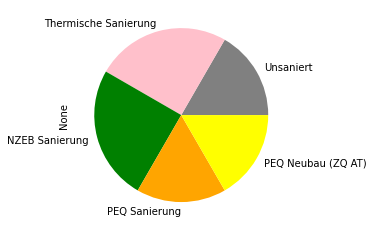

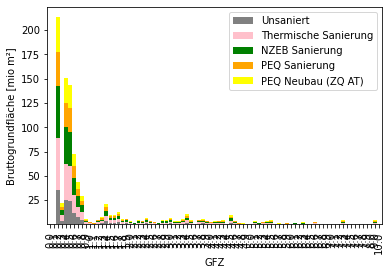

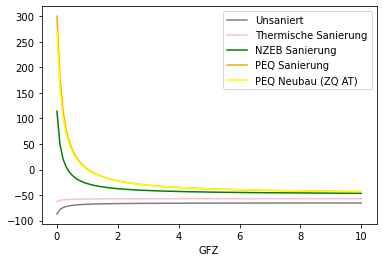

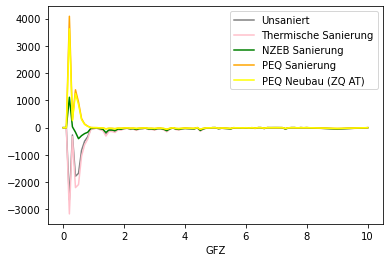

In [6]:
#plots
df[anteile].sum().plot(kind="pie", colors=colors)
ax = df[anteile].plot(kind="bar", stacked=True, width=0.95, color=colors)
ax.set_ylabel("Bruttogrundfläche [mio m²]")

zw[anteile].plot(color=colors)
peb.plot(color=colors)

In [7]:
peb["Summe"] = peb.sum(axis=1)
summe = peb.sum() * 3.6
summe # kWh/m2 * mio m² = GWh/a * 3.6 = TJ/a

Unsaniert              -38490.112444
Thermische Sanierung   -47903.448985
NZEB Sanierung          -8785.705011
PEQ Sanierung           22313.229551
PEQ Neubau (ZQ AT)      19461.632942
Summe                  -53404.403946
dtype: float64

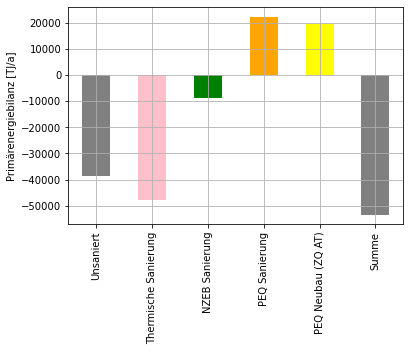

In [9]:
ax = summe.plot(kind="bar", color=colors, grid=True)
ax.set_ylabel("Primärenergiebilanz [TJ/a]")
kum = peb.cumsum(axis=0)

Text(0, 0.5, 'Primärenergiebilanz [TJ/a]')

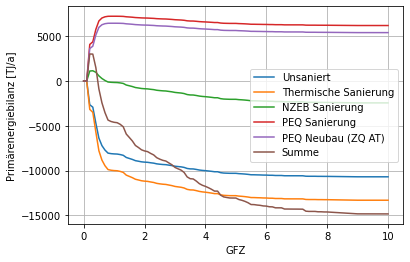

In [11]:
ax = kum.plot(grid=True)
ax.set_ylabel("Primärenergiebilanz [TJ/a]")

In [12]:
import utils.nextcloud

file_path = "EE/6_Daten/Energie Österreich/Energiebilanzen_AT_1970-2020_Statistik_Austria.xlsx"
file = utils.nextcloud.get(file_path)
df = pd.read_excel(file, sheet_name="Sektoraler Endverbrauch TJ")

In [20]:
df.index =  df.Bereich

In [31]:
df.loc["Gebäude",:] = df.loc["Private Haushalte",:] + df.loc["Öffentliche und Private Dienstleistungen",:]
df.loc["Gebäude","Bereich"] = "Gebäude"
df.loc["Gebäude", 2011].round()

381595.0